# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [817]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [818]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
67,1,Wisconsin,Illinois,264
68,1,Illinois,Indiana,208
69,1,Michigan,Illinois,391
70,1,Ohio,Michigan,254


DiGraph with 29 nodes and 72 edges


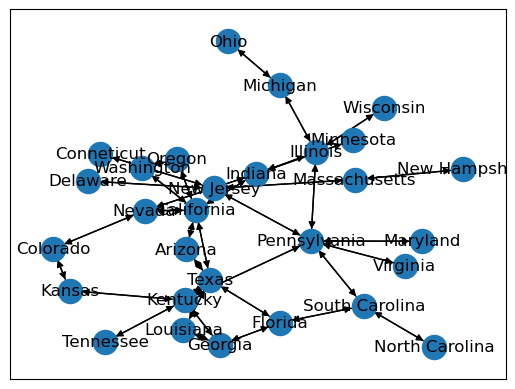

In [819]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
Mississippi_Graph = Mississippi_Graph.to_directed(as_view=False)
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [820]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [821]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [822]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m

In [823]:
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    return df

In [824]:
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df3

In [825]:
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4

In [826]:
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [ ]:
def cost_function(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance','Trucks needed for route'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand], 'Trucks needed for route': b[i] / 650}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4

In [827]:
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [828]:
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    return df1

In [829]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    print('Entropic degree:')
    display(i)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [830]:
metrics_graph(graph=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3034
27,Ohio,2889
26,Washington,2885
25,Oregon,2728
24,Michigan,2635
23,Wisconsin,2508
22,Indiana,2452
21,Nevada,2322
20,Illinois,2244
19,California,2192


Average shortest path to production center:


1826.9642857142858

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
9,Kentucky,2601.372566
14,Pennsylvania,2300.594197
3,Nevada,2214.239695
25,Illinois,1397.098262
7,Louisiana,1244.380678
4,Arizona,1216.949336
8,Florida,1158.102446


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3034,820000,2487880000
27,Ohio,2889,1855000,5359095000
26,Washington,2885,2280000,6577800000
25,Oregon,2728,855000,2332440000
24,Michigan,2635,1000000,2635000000
23,Wisconsin,2508,1100000,2758800000
22,Indiana,2452,5450000,13363400000
21,Nevada,2322,2150000,4992300000
20,Illinois,2244,6012000,13490928000
19,California,2192,14123800,30959369600


Total distance per product=


1123.589987463836

Entropic degree:


,Entropic_Degree
California,10101.622042
Texas,8537.698356
Indiana,7466.658887
Kentucky,4717.331700
Nevada,4245.905455
Pennsylvania,3942.749267
Illinois,2494.283836
Arizona,2287.047361
Florida,2109.860532
Colorado,1961.406416


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,2300.594197,1.079669
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE LOUISIANA

In [891]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
directed1 = pd.read_excel('distance_state_louisiana.xlsx')
# Show contents of the dataframe
directed1

,weight,0,b,Distance
0,1,California,Oregon,536
1,1,California,Arizona,755
2,1,Kentucky,Tennessee,210
3,1,Kentucky,Georgia,407
4,1,Florida,South Carolina,355
5,1,Kentucky,Kansas,621
6,1,Pennsylvania,Maryland,112
7,1,Pennsylvania,Virginia,220
8,1,Pennsylvania,New Jersey,127
9,1,New Jersey,Conneticut,180


DiGraph with 29 nodes and 28 edges


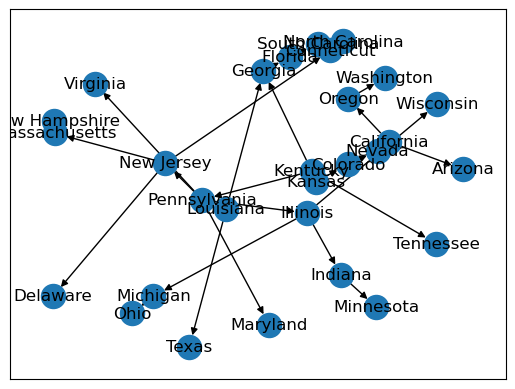

In [892]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
Directed_Graph1= nx.from_pandas_edgelist(directed1, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Graph1,with_labels=True)
print(Directed_Graph1)

In [833]:
metrics_graph(graph=Directed_Graph1,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
15,New Hampshire,0.000297
27,Delaware,0.000279
13,Conneticut,0.000237
26,North Carolina,0.000209
14,Massachusetts,0.000194
6,Florida,0.000187
7,South Carolina,0.000182
10,Maryland,0.000182
12,New Jersey,0.000175
4,Tennessee,0.000170


Shortest path to production center:


,State,Shortest_path_to_production_facility
5,North Carolina,1369
4,South Carolina,1142
3,Florida,787
2,Georgia,526
1,Texas,432
0,Louisiana,0


Average shortest path to production center:


851.2

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Pennsylvania,0.017196
0,California,0.015873
23,Nevada,0.015873
18,Illinois,0.013228
28,Colorado,0.013228
12,New Jersey,0.010582
5,Georgia,0.007937
8,Kansas,0.007937
6,Florida,0.007937
1,Oregon,0.006614


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
3,Kentucky,1560.525106
24,Louisiana,1244.380678
0,California,1071.844388
9,Pennsylvania,1030.531892
18,Illinois,706.745746
28,Colorado,504.900000
12,New Jersey,432.323032
16,Indiana,322.719000
8,Kansas,281.448000
6,Florida,194.859500


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
5,North Carolina,1369,397800,544588200
4,South Carolina,1142,2340000,2672280000
3,Florida,787,4890000,3848430000
2,Georgia,526,1385000,728510000
1,Texas,432,8834000,3816288000
0,Louisiana,0,50000000,0


Total distance per product=


171.12223715783205

Entropic degree:


,Entropic_Degree
Kentucky,2829.857840
Pennsylvania,1766.121494
California,1671.523503
Illinois,1261.775594
Louisiana,1244.380678
Colorado,990.000000
New Jersey,827.254176
Indiana,582.000000
Kansas,540.000000
Florida,355.000000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
18,California,0.000110,0.015873,1071.844388,0.001873
25,Pennsylvania,0.000064,0.017196,1030.531892,0.001126
8,New Jersey,0.000175,0.010582,432.323032,0.000801
23,Illinois,0.000069,0.013228,706.745746,0.000648
21,Colorado,0.000084,0.013228,504.900000,0.000561
5,Florida,0.000187,0.007937,194.859500,0.000290
10,Georgia,0.000153,0.007937,134.114850,0.000163
14,Indiana,0.000120,0.003968,322.719000,0.000153
26,Kansas,0.000058,0.007937,281.448000,0.000128
6,South Carolina,0.000182,0.005291,118.811800,0.000115


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE PENNSYLVANIA

In [834]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
directed = pd.read_excel('distance_state_pennsylvania.xlsx')
# Show contents of the dataframe
directed

,weight,0,b,Distance
0,1,California,Oregon,536
1,1,California,Arizona,755
2,1,Kentucky,Tennessee,210
3,1,Kentucky,Georgia,407
4,1,Florida,South Carolina,355
5,1,Kentucky,Kansas,621
6,1,Pennsylvania,Maryland,112
7,1,Pennsylvania,Virginia,220
8,1,Pennsylvania,New Jersey,127
9,1,New Jersey,Conneticut,180


DiGraph with 29 nodes and 28 edges


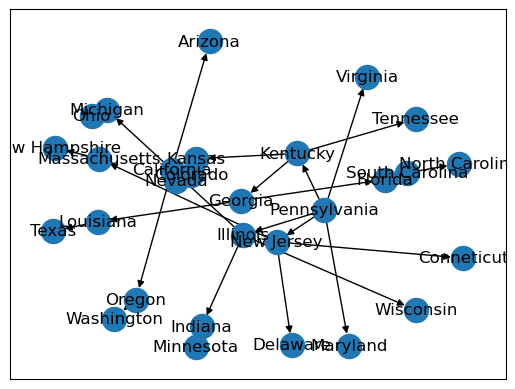

In [835]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000
Directed_Graph= nx.from_pandas_edgelist(directed, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Graph,with_labels=True)
print(Directed_Graph)

In [836]:
metrics_graph(graph=Directed_Graph,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
27,Delaware,0.000407
15,New Hampshire,0.000362
10,Maryland,0.000319
13,Conneticut,0.000293
12,New Jersey,0.000281
14,Massachusetts,0.000209
26,North Carolina,0.000189
11,Virginia,0.000162
7,South Carolina,0.000160
6,Florida,0.000149


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
23,Nevada,0.021164
0,California,0.019841
28,Colorado,0.019841
3,Kentucky,0.018519
8,Kansas,0.015873
5,Georgia,0.013228
1,Oregon,0.007937
6,Florida,0.007937
18,Illinois,0.006614
7,South Carolina,0.005291


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
9,Pennsylvania,2808.545510
0,California,1071.844388
3,Kentucky,982.963649
18,Illinois,706.745746
5,Georgia,515.982704
28,Colorado,504.900000
12,New Jersey,432.323032
16,Indiana,322.719000
8,Kansas,281.448000
24,Louisiana,252.072000


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3598,3210500,11551379000
27,Washington,3539,2280000,8068920000
26,Oregon,3379,855000,2889045000
25,California,2843,14123800,40153963400
24,Nevada,2713,2150000,5832950000
23,Texas,1927,8834000,17023118000
22,North Carolina,1812,397800,720813600
21,Colorado,1723,1000000,1723000000
20,South Carolina,1585,2340000,3708900000
19,Minnesota,1539,820000,1261980000


Total distance per product=


943.9459365434177

Entropic degree:


,Entropic_Degree
Pennsylvania,2808.545510
Kentucky,1782.507298
California,1671.523503
Illinois,1261.775594
Georgia,1004.150441
Colorado,990.000000
New Jersey,827.254176
Indiana,582.000000
Kansas,540.000000
Louisiana,432.000000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
17,California,0.000111,0.019841,1071.844388,0.002363
26,Kentucky,0.000064,0.018519,982.963649,0.001157
22,Colorado,0.000094,0.019841,504.900000,0.000940
20,Georgia,0.000104,0.013228,515.982704,0.000709
4,New Jersey,0.000281,0.005291,432.323032,0.000643
24,Kansas,0.000079,0.015873,281.448000,0.000354
9,Florida,0.000149,0.007937,194.859500,0.000230
27,Illinois,0.000048,0.006614,706.745746,0.000223
25,Nevada,0.000077,0.021164,67.795000,0.000111
19,Louisiana,0.000109,0.003968,252.072000,0.000109


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE LOUISIANA

In [893]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
huge_network = pd.read_excel('all_distances2.xlsx')
# Show contents of the dataframe
huge_network

,0,b1,Distance,b2
0,Washington,New York,2907.6,New York
1,Washington,Maryland,2811.0,Maryland
2,Washington,Georgia,2688.8,Georgia
3,Washington,Maine,3234.6,Maine
4,Washington,Texas,2249.1,Texas
...,...,...,...,...
1445,Wisconsin,New Mexico,1352.2,New Mexico
1446,Wisconsin,Illinois,273.1,Illinois
1447,Wisconsin,Florida,1124.9,Florida
1448,Wisconsin,Kansas,543.4,Kansas


In [894]:
huge_network['b1'] = huge_network['b2']
huge_network.rename(columns={"b1":"b"},inplace=True)
huge_network.drop(huge_network.columns[[3]], axis=1, inplace=True)
huge_network

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [895]:
huge_network2 = huge_network.copy()

In [896]:
huge_network2

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [897]:
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == 'Connecticut':
        huge_network.iloc[i,1] = 'Conneticut'

In [898]:
for i in range(len(huge_network)):        
    if huge_network.iloc[i,0] == 'Connecticut':
        huge_network.iloc[i,0] = 'Conneticut'

In [899]:
huge_network2 = huge_network.copy()

In [900]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] not in c:
        l2.append(i)
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == huge_network.iloc[i,0]:
        l2.append(i)

In [901]:
joinedlist = l2

In [902]:
huge_network2.drop(huge_network2.index[joinedlist], inplace=True)

In [903]:
huge_network2

,0,b,Distance
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
4,Washington,Texas,2249.1
5,Washington,Louisiana,2579.6
8,Washington,Massachusetts,3074.6
...,...,...,...
1443,Wisconsin,Oregon,2022.7
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


Graph with 29 nodes and 406 edges


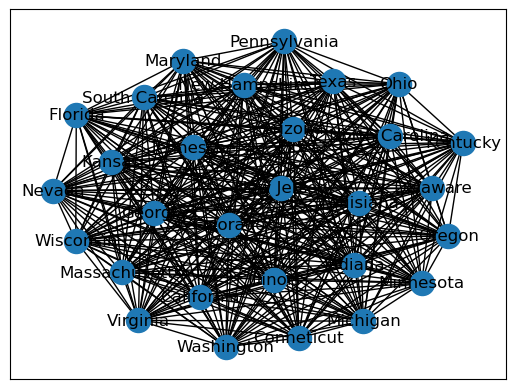

In [904]:
Huge_Graph = nx.from_pandas_edgelist(huge_network2, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph,with_labels=True)
print(Huge_Graph)

DiGraph with 29 nodes and 56 edges


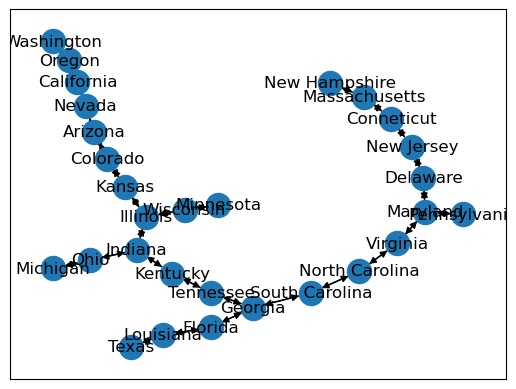

In [905]:
a = nx.minimum_spanning_tree(Huge_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
a = a.to_directed(as_view=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [911]:
nx.shortest_path_length(a,'Louisiana','South Carolina','Distance')

937.5

In [906]:
metrics_graph(graph=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4859.1
27,Oregon,4700.7
26,California,4164.6
25,Nevada,4033.9
24,Arizona,3294.4
23,Colorado,2475.8
22,Minnesota,2082.0
21,New Hampshire,2020.9
20,Massachusetts,1952.3
19,Kansas,1930.6


Average shortest path to production center:


1959.3571428571431

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
4,Louisiana,1133.634989
19,Arizona,1078.184392
10,Colorado,898.804728
25,Illinois,706.553115
27,Kansas,618.951777
2,Georgia,560.289340
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
12,Kentucky,486.572352


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4859.1,2280000,11078748000.0
27,Oregon,4700.7,855000,4019098500.0
26,California,4164.6,14123800,58819977480.000008
25,Nevada,4033.9,2150000,8672885000.0
24,Arizona,3294.4,3210500,10576671200.0
23,Colorado,2475.8,1000000,2475800000.0
22,Minnesota,2082.0,820000,1707240000.0
21,New Hampshire,2020.9,63800,128933420.0
20,Massachusetts,1952.3,1000000,1952300000.0
19,Kansas,1930.6,2120000,4092872000.0


Total distance per product=


1265.7705845434102

Entropic degree:


,Entropic_Degree
Arizona,2026.262470
Colorado,1762.362211
Illinois,1261.431684
Kansas,1187.551376
Louisiana,1133.634989
Georgia,1090.375284
Nevada,1030.079520
Florida,930.534713
Oregon,856.451480
Indiana,830.386680


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
2,Georgia,0.000749,0.595238,560.289340,0.249877
5,Illinois,0.000704,0.489418,706.553115,0.243515
3,Indiana,0.000740,0.560847,460.449414,0.191131
1,Kentucky,0.000750,0.515873,486.572352,0.188258
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE GEORGIA

In [909]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 50000000

In [910]:
metrics_graph(graph=a,weight='Distance',demand='warehouse size',location='Georgia')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4137.3
27,Oregon,3978.9
26,California,3442.8
25,Nevada,3312.1
24,Arizona,2572.6
23,Colorado,1754.0
22,Minnesota,1360.2
21,New Hampshire,1299.1
20,Massachusetts,1230.5
19,Kansas,1208.8


Average shortest path to production center:


1334.6785714285713

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,Georgia,1090.375284
19,Arizona,1078.184392
10,Colorado,898.804728
25,Illinois,706.553115
27,Kansas,618.951777
4,Louisiana,582.518339
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
12,Kentucky,486.572352


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4137.3,2280000,9433043999.999998
27,Oregon,3978.9,855000,3401959500.0
26,California,3442.8,14123800,48625418639.999992
25,Nevada,3312.1,2150000,7121015000.0
24,Arizona,2572.6,3210500,8259332300.0
23,Colorado,1754.0,1000000,1754000000.0
22,Minnesota,1360.2,820000,1115364000.0
21,New Hampshire,1299.1,63800,82882580.0
20,Massachusetts,1230.5,1000000,1230500000.0
19,Kansas,1208.8,2120000,2562656000.0


Total distance per product=


821.8340710559196

Entropic degree:


,Entropic_Degree
Arizona,2026.262470
Colorado,1762.362211
Illinois,1261.431684
Kansas,1187.551376
Louisiana,1133.634989
Georgia,1090.375284
Nevada,1030.079520
Florida,930.534713
Oregon,856.451480
Indiana,830.386680


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
2,Georgia,0.000749,0.595238,1090.375284,0.486284
5,Illinois,0.000704,0.489418,706.553115,0.243515
3,Indiana,0.000740,0.560847,460.449414,0.191131
1,Kentucky,0.000750,0.515873,486.572352,0.188258
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


# PART 2 CLUSTER CODE

In [853]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 8350000


In [854]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
locations = pd.read_csv('us-state-capitals.csv')
# Show contents of the dataframe
locations

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [855]:
locations.rename(columns={"name":"0"},inplace=True)
locations.drop(locations.columns[[1]], axis=1, inplace=True)
locations

,0,latitude,longitude
0,Alabama,32.377716,-86.300568
1,Alaska,58.301598,-134.420212
2,Arizona,33.448143,-112.096962
3,Arkansas,34.746613,-92.288986
4,California,38.576668,-121.493629
5,Colorado,39.739227,-104.984856
6,Connecticut,41.764046,-72.682198
7,Delaware,39.157307,-75.519722
8,Hawaii,21.307442,-157.857376
9,Florida,30.438118,-84.281296


In [856]:
for i in range(len(locations)):        
    if locations.iloc[i,0] == 'Connecticut':
        locations.iloc[i,0] = 'Conneticut'

In [857]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(locations)):
    if locations.iloc[i,0] not in c:
        l2.append(i)

In [858]:
locations.drop(locations.index[l2], inplace=True)
a = locations.pop('0')
#locations.drop(locations.columns[[0]], axis=1, inplace=True)
locations

,latitude,longitude
2,33.448143,-112.096962
4,38.576668,-121.493629
5,39.739227,-104.984856
6,41.764046,-72.682198
7,39.157307,-75.519722
9,30.438118,-84.281296
10,33.749027,-84.388229
12,39.798363,-89.654961
13,39.768623,-86.162643
15,39.048191,-95.677956


In [859]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np


def get_even_clusters(X, cluster_size):
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    centroids = kmeans.cluster_centers_
    print(centroids)
    return clusters

In [860]:
b  = get_even_clusters(locations, 10)

[[  39.91882644  -75.00231089]
 [  40.483703   -117.3794975 ]
 [  37.329407    -87.98762186]]


In [861]:
df = pd.DataFrame(b, a)
df.rename(columns={0:"cluster"},inplace=True)
df

,cluster
0,
Arizona,1
California,1
Colorado,1
Conneticut,0
Delaware,0
Florida,2
Georgia,2
Illinois,2
Indiana,2


In [862]:
cluster1 = df.loc[df['cluster'] == 0]

In [863]:
list1 = cluster1.index.tolist()

In [864]:
cluster2 = df.loc[df['cluster'] == 1]

In [865]:
cluster3 = df.loc[df['cluster'] == 2]

In [866]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list1 or huge_network2.iloc[i,1] not in list1:
        l2.append(i)

In [867]:
cluster_network1 = huge_network2.copy()

In [868]:
cluster_network1.drop(cluster_network1.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


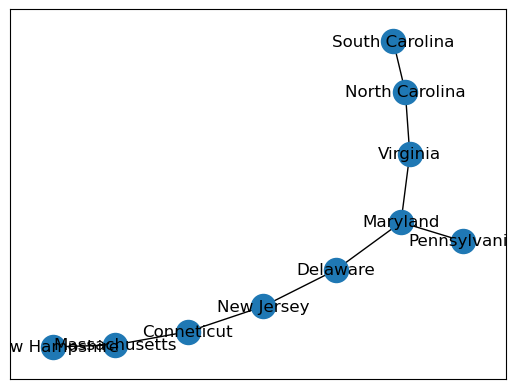

In [869]:
Cluster1_Graph = nx.from_pandas_edgelist(cluster_network1, 0, 'b', edge_attr='Distance')
Cluster1_Graph = nx.minimum_spanning_tree(Cluster1_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster1_Graph,with_labels=True)
print(Cluster1_Graph)

In [870]:
list2 = cluster2.index.tolist()


In [871]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list2 or huge_network2.iloc[i,1] not in list2:
        l2.append(i)

In [872]:
cluster_network2 = huge_network2.copy()

In [873]:
cluster_network2.drop(cluster_network2.index[l2], inplace=True)

Graph with 9 nodes and 8 edges


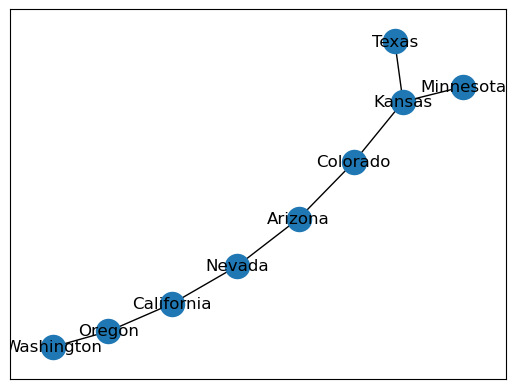

In [874]:
Cluster2_Graph = nx.from_pandas_edgelist(cluster_network2, 0, 'b', edge_attr='Distance')
Cluster2_Graph = nx.minimum_spanning_tree(Cluster2_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster2_Graph,with_labels=True)
print(Cluster2_Graph)

In [875]:
list3 = cluster3.index.tolist()

In [876]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list3 or huge_network2.iloc[i,1] not in list3:
        l2.append(i)

In [877]:
cluster_network3 = huge_network2.copy()

In [878]:
cluster_network3.drop(cluster_network3.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


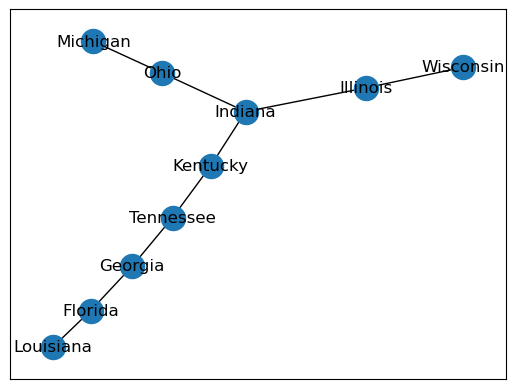

In [879]:
Cluster3_Graph = nx.from_pandas_edgelist(cluster_network3, 0, 'b', edge_attr='Distance')
Cluster3_Graph = nx.minimum_spanning_tree(Cluster3_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster3_Graph,with_labels=True)
print(Cluster3_Graph)

In [881]:
def metrics_cluster(graph1,graph2,graph3,weight,demand,location1,location2,location3):
    b1 = shortest_path(graph1,location1,weight)
    b2 = shortest_path(graph2,location2,weight)
    b3 = shortest_path(graph3,location3,weight)
    e = average_shortest_path(graph,location,weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    
    print('Shortest path to production center:')
    display(b1)
    display(b2)
    display(b3)
    print('Average shortest path to production center:')
    display(e)
    display(g)
    print("Total distance per product=")
    display(h)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [882]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    print('Entropic degree:')
    display(i)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [888]:
def metrics_cluster(graph1,graph2,graph3,weight,demand,location1,location2,location3):
    global b4
    b1 = shortest_path(graph1,location1,weight)
    b2 = shortest_path(graph2,location2,weight)
    b3 = shortest_path(graph3,location3,weight)
    b4 = pd.concat([b1, b2, b3])
    average_shortest_path = b4['Shortest_path_to_production_facility'].sum() / len(b4) - 3
    display(b4)
    print("Average shortest path:", average_shortest_path)
    
    g1 = shortest_path_product1(graph1,location1,weight,demand)
    g2 = shortest_path_product1(graph2,location2,weight,demand)
    g3 = shortest_path_product1(graph3,location3,weight,demand)
    g4 = pd.concat([g1, g2, g3])
    average_shortest_product_path = g4['Total_distance'].sum()/g4['Warehouse_size'].sum()
    display(g4)
    print('Average shortest path per product:', average_shortest_product_path)

# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE LOUISIANA

In [889]:
metrics_cluster(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','Pennsylvania','California','Louisiana')

,State,Shortest_path_to_production_facility
9,South Carolina,653.9
8,New Hampshire,645.3
7,Massachusetts,576.7
6,Conneticut,475.2
5,North Carolina,428.0
4,New Jersey,288.1
3,Virginia,250.3
2,Delaware,175.4
1,Maryland,107.9
0,Pennsylvania,0


Average shortest path: 919.4137931034481


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,South Carolina,653.9,2340000,1530126000.0
8,New Hampshire,645.3,63800,41170140.0
7,Massachusetts,576.7,1000000,576700000.0
6,Conneticut,475.2,8350000,3967920000.0
5,North Carolina,428.0,397800,170258400.0
4,New Jersey,288.1,2260000,651106000.0
3,Virginia,250.3,2300000,575690000.0
2,Delaware,175.4,1000200,175435080.0
1,Maryland,107.9,2300000,248170000.0
0,Pennsylvania,0,14123800,0


Average shortest path per product: 909.1769999713421


# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE KENTUCKY

In [890]:
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 5145000
metrics_cluster(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','Pennsylvania','California','Kentucky')

,State,Shortest_path_to_production_facility
9,South Carolina,653.9
8,New Hampshire,645.3
7,Massachusetts,576.7
6,Conneticut,475.2
5,North Carolina,428.0
4,New Jersey,288.1
3,Virginia,250.3
2,Delaware,175.4
1,Maryland,107.9
0,Pennsylvania,0


Average shortest path: 690.9931034482759


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,South Carolina,653.9,2340000,1530126000.0
8,New Hampshire,645.3,63800,41170140.0
7,Massachusetts,576.7,1000000,576700000.0
6,Conneticut,475.2,8350000,3967920000.0
5,North Carolina,428.0,397800,170258400.0
4,New Jersey,288.1,2260000,651106000.0
3,Virginia,250.3,2300000,575690000.0
2,Delaware,175.4,1000200,175435080.0
1,Maryland,107.9,2300000,248170000.0
0,Pennsylvania,0,14123800,0


Average shortest path per product: 424.6246416596521
